<a href="https://colab.research.google.com/github/Ph1so/Ice-Cream-Profits/blob/main/Predicting_ice_cream_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('/content/Ice Cream Sales - temperatures.csv')
df.head()

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02


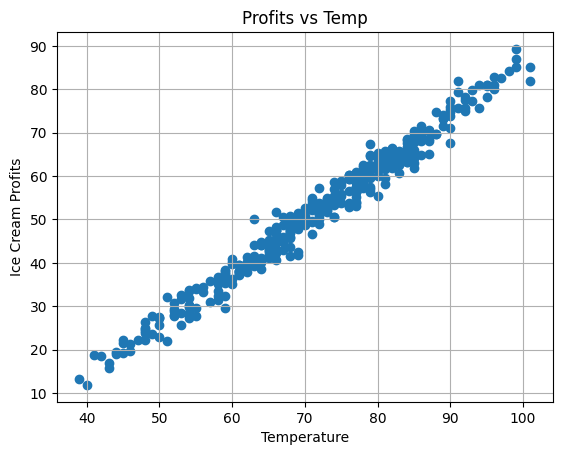

In [ ]:
plt.scatter(df['Temperature'], df['Ice Cream Profits'], marker='o')
plt.xlabel('Temperature')
plt.ylabel('Ice Cream Profits')
plt.title('Profits vs Temp')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
# Assuming df is your DataFrame
X = df['Temperature']  # Features
y = df['Ice Cream Profits']    # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# If you want to specify the exact number of samples in each set
# You can calculate the number of samples for each set based on the total number of samples
total_samples = len(df)
train_size = 0.8  # 80% of data for training, 20% for testing
train_samples = int(train_size * total_samples)
test_samples = total_samples - train_samples

# Randomly shuffle the indices
indices = df.index.tolist()
np.random.shuffle(indices)

# Split the indices into training and testing indices
train_indices = indices[:train_samples]
test_indices = indices[train_samples:]

# Split the dataset into training and testing sets based on the indices
X_train = X.loc[train_indices]
y_train = y.loc[train_indices]
X_test = X.loc[test_indices]
y_test = y.loc[test_indices]

In [ ]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 6.626047895592907


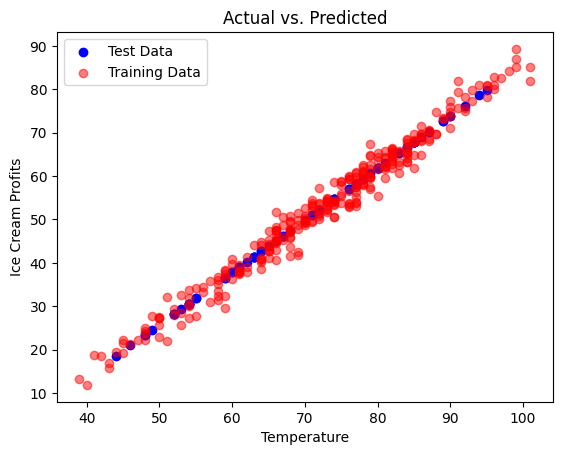

In [ ]:
plt.scatter(X_test, y_pred, color='blue', label='Test Data')
plt.scatter(X_train, y_train, color='red', label='Training Data', alpha=0.5)

plt.xlabel('Temperature')
plt.ylabel('Ice Cream Profits')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()